<h1 style="font-size: 28px;"> FLOYD WARSHALL ALGORITHM:(22PD07,22PD24) </h1>
<p>
<h3>Input:</h3>
A Weighted Di-graph <br>


<h3>Output:</h3>
Shortest Path from each node to every other node in a graph and a graph visualising the shortest possible paths .

</p>


![Screenshot 2024-03-31 at 12.36.30 AM.png](<attachment:Screenshot 2024-03-31 at 12.36.30 AM.png>)
![Screenshot 2024-03-31 at 12.36.13 AM.png](<attachment:Screenshot 2024-03-31 at 12.36.13 AM.png>)


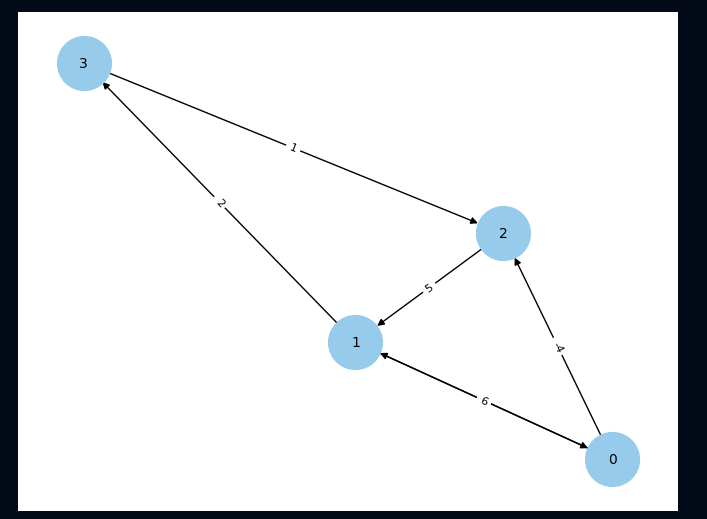
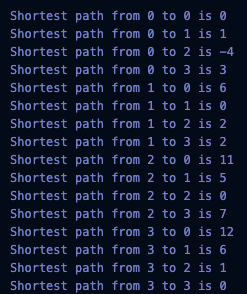

In [6]:
import networkx as nx
import matplotlib.pyplot as plt


In [7]:
def floyd_warshall(graph):
    n = len(graph)
    dist = [[float("inf")] * n for i in range(n)]
    for i in range(n):
        dist[i][i] = 0
        for neighbor, weight in graph[i]:
            dist[i][neighbor] = weight

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

In [8]:
def visualize_graph(graph):
    G = nx.DiGraph()
    G.add_nodes_from(range(len(graph)))

    for i in range(len(graph)):
        for neighbor, weight in graph[i]:
            G.add_edge(i, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10)

    edge_labels = {(i, j): weight for i in range(len(graph)) for j, weight in graph[i]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.axis('off')
    plt.show()



<h5> Spring_layout will caculate the node positions using spring layout algorithm.It assigns position to make the viusal appeal of the graph good.<br>In the above fn pos will contain an array like:</h5>

![Screenshot 2024-03-31 at 12.35.41 AM.png](<attachment:Screenshot 2024-03-31 at 12.35.41 AM.png>)

In [9]:
def input_graph():
    graph = {}
    n = int(input("Enter the number of vertices: "))
    for i in range(n):
        edges = []
        while True:
            neighbor = int(input(f"Enter the neighbor vertex for vertex {i} (-1 to stop): "))
            if neighbor == -1:
                break
            weight = int(input(f"Enter the weight for edge ({i}, {neighbor}): "))
            edges.append((neighbor, weight))
        graph[i] = edges
    return graph

<h5>We output graph as a dictionary.Where each node represents a key and its value contains a list which 2D and contains the node neighbouring to the key and the corresponding key-neighbouring node weight.</h5>

In [ ]:
if __name__ == "__main__":
    graph = input_graph()
    dist = floyd_warshall(graph)

    for i in range(len(graph)):
        for j in range(len(graph)):
            print(f"Shortest path from {i} to {j} is {dist[i][j]}")

    visualize_graph(graph)